-------------------------------------------------------------------------------
# Tech Challenge - Fase 1
###Turma: 5IADT
###Equipe:
*   Celso Norio Okuyama
*   Fabrícia Souza Lima
*   João Mário Künzle Ribeiro Magalhães
*   Pamela Korila

### Tema do Projeto: Regressão de despesas médicas
### Descrição:
#### O objetivo deste projeto é desenvolver modelos de machine learning de regressão, que permita calcular encargos médicos de um paciente baseado no conjunto de variáveis abaixo:

<INCLUIR A DESCRIÇÃO DA BASE DE DADOS>


#### Fonte da Base de Dados:
#####A base de dados utilizada para treino e teste foi retirada do Kaggle, acessado através da URL abaixo em 05/04/2025.
https://www.kaggle.com/code/ruslankl/health-care-cost-prediction-w-linear-regression?select=insurance.csv

####Para facilidade de manipulação e apresentação, antes de carregar o arquivo, o header e o valores das variáveis que estavam em inglês foram traduzidos para português.







--------------------------------------------------------------------------------

## Import de Libraries

In [ ]:
#Bibliotecas de manipulações de dataframes e matrizes e matemáticas
import pandas as pd
import numpy as np
import math

#Bibiliotecas gráficas
from matplotlib import pyplot as plt
import seaborn as sns



--------------------------------------------------------------------------------
##Funções auxiliares

In [ ]:
def plot_norm_barplot_hue( df_in, col_name, sub_col_name, size ):
  df_tmp_apol=df_in.groupby([col_name,sub_col_name]).agg( Total= (col_name, 'count')).reset_index()
  df_tmp_apol[col_name]= df_tmp_apol[col_name].astype(str)
  df_tmp_apol['Perc_Total']= round((df_tmp_apol['Total']/df.shape[0]) * 100,2)
  plt.figure(figsize=size)
  ax=sns.barplot(data=df_tmp_apol.sort_values(col_name, ascending= True), x=col_name, y='Perc_Total',hue=sub_col_name)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
def plot_barplot_hue( df_in, col_name, sub_col_name, size ):
  df_tmp_apol=df_in.groupby([col_name,sub_col_name]).agg( Total= (col_name, 'count')).reset_index()
  df_tmp_apol[col_name]= df_tmp_apol[col_name].astype(str)
  plt.figure(figsize=size)
  ax=sns.barplot(data=df_tmp_apol.sort_values(col_name, ascending= True), x=col_name, y='Total',hue=sub_col_name)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
def plot_barplot( df_in, col_name, size ):
  df_tmp_apol=df_in.groupby(col_name).agg( Total= (col_name, 'count')).reset_index()
  df_tmp_apol[col_name]= df_tmp_apol[col_name].astype(str)
  plt.figure(figsize=size)
  ax=sns.barplot(data=df_tmp_apol.sort_values(col_name, ascending= True), x=col_name, y='Total', color= "skyblue")
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
def plot_histogram( df_in, df_in_descr, col_name, nbins, size ):
  plt.figure(figsize=size)
  ax=sns.histplot(data=df_in, x=col_name, bins=nbins,linewidth=1, color= "skyblue")

  plt.axvline(df_in_descr["mean"], color='magenta', label='Média', linewidth=2)
  plt.axvline(df_in_descr["50%"], color='blue', label='Mediana', linewidth=2)
  plt.axvline(df_in_descr["moda"], color='red', label='Moda', linewidth=2)
  plt.legend()

--------------------------------------------------------------------------------
### Versão do Modelo

In [ ]:
versao="0.1"

-------------------------------------------------------------------------------
###Diretórios de entrada e saída

Obs: Ajustar os paths dos diretórios às configurações do ambiente de execução:

dir_in: é o diretório de entrada onde está a base de dados a ser carregada

dir_out: é o diretório de saída onde serão gravados a analytical base table (ABT) utilizada no treinamento e teste

file_in: é o nome do arquivo de entrada com a base de dados

file_out: é o nome do arquivo de saída com a ABT

In [ ]:
dir_in='/content/drive/MyDrive/FIAP/FASE_1/TechChallenge/IN'

dir_out='/content/drive/MyDrive/FIAP/FASE_1/TechChallenge/OUT'

file_in='insurance_20250405-port.csv'

file_out_abt='insurance-port_abt_20250405.csv'

--------------------------------------------------------------------------------
#Parte 1: Carga dos dados e tratamento inical
O arquivo com a base de dados será carregado e serão feitos os seguintes tratamentos iniciais:
*   1.1 Tratamento de variáveis com valores nulos
*   1.2   Tratamento de linhas duplicadas
*   1.3   Tratamento de valores inválidos nas variáveis
*   1.4   Criação de novas variáveis

In [ ]:
#leitura da base de dados no dataframe df do Pandas
df= pd.read_csv(dir_in+'/'+file_in)

In [ ]:
#quantidade de linhas e colunas carregadas
df.shape

(1338, 7)

In [ ]:
#verificação das variáveis carregadas e seus respectivos tipos
df.dtypes

,0
idade,int64
genero,object
imc,float64
filhos,int64
fumante,object
regiao,object
encargos,float64


In [ ]:
#visualização de algumas linhas carregadas
df.head(5)

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,F,27.900,0,S,Sudoeste,16884.92400
1,18,M,33.770,1,N,Sudeste,1725.55230
2,28,M,33.000,3,N,Sudeste,4449.46200
3,33,M,22.705,0,N,Noroeste,21984.47061
4,32,M,28.880,0,N,Noroeste,3866.85520


--------------------------------------------------------------------------------
#### 1.1. Tratamento de Valores Nulos
Seguem alguns tratamentos que podem ser aplicados, caso existam valores nulos:

1.   Se ocorrer em "poucas" linhas, essas linhas podem ser removidas do dataframe.
2.   Se uma variável apresentar um porcentagem muito grande de valores nulos, essa variável pode ser eliminada da análise.



Conforme verificado abaixo, a base carregada não apresenta valores nulos, portanto nenhum tratamento é necessário.

In [ ]:
#verificação de valores nulos
df.isnull().sum()

,0
idade,0
genero,0
imc,0
filhos,0
fumante,0
regiao,0
encargos,0


--------------------------------------------------------------------------------
####1.2. Tratamento de linhas duplicadas

Caso haja linhas duplicadas, o tratamento dado será eliminar as duplicações.

Conforme verificado no código abaixo, há uma linha duplicada.

In [ ]:
#verificação de dados duplicados
df.duplicated().sum()

np.int64(1)

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
#verificação de dados duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(1337, 7)

--------------------------------------------------------------------------------
####1.3. Tratamento de valores inválidos

Elimina as linhas que possuem valor inválido em algumas de suas variáveis. Por exemplo, valor negativo para uma variável de idade.

--------------------------------------------------------------------------------
Conforme verificado abaixo, não há nenhuma linha com valores inválidos para idade, imc, número de filhos ou encargos.

In [ ]:
#verifica se há alguma linha com idade, imc, número de filhos ou encargos com valores negativos
df.query('idade < 0 or imc < 0 or filhos < 0 or encargos < 0' ).shape[0]

0

--------------------------------------------------------------------------------
Conforme verificado abaixo, não há nenhuma linha com valores inválidos para gênero, fumante ou região.

In [ ]:
#verifica se há alguma linha com genero diferente de 'F' ou 'M'
df['genero'].value_counts()

,count
genero,
M,675
F,662


In [ ]:
#verifica se há alguma linha com valor de fumante diferente de 'N' ou 'S'
df['fumante'].value_counts()

,count
fumante,
N,1063
S,274


In [ ]:
#verifica se há alguma linha com valor de regiao inválido
df['regiao'].value_counts()

,count
regiao,
Sudeste,364
Sudoeste,325
Noroeste,324
Nordeste,324


--------------------------------------------------------------------------------
####1.4. Criação de nova(s) variável(is)

A(s) seguinte(s) estão sendo criada(s) a fim de auxiliar na análise exploratória e no modelo de regressão:


*   Faixa_Etaria: Variável que irá agrupar os pacientes em faixas.


--------------------------------------------------------------------------------
#####Variável Faixa Etária: divide os pacientes nas seguintes faixas, conforme a sua idade:
*     0: de 0 até 9 anos
*     1: de 10 até 19 anos
*     2: de 20 até 29 anos
*     3: de 30 até 39 anos
*     4: de 40 até 49 anos
*     5: de 50 até 59 anos
*     6: de 60 até 69 anos
*     7: 70 anos ou mais


In [ ]:
#Criação da variável de faixa etária
def faixa_etaria( idade ):
  if ( idade < 10 ):
    return "0"
  elif ( idade < 20 ):
    return "1"
  elif ( idade < 30):
    return "2"
  elif ( idade < 40 ):
    return "3"
  elif ( idade < 50 ):
    return "4"
  elif ( idade < 60 ):
    return "5"
  elif ( idade < 70 ):
    return "6"
  else:
    return "7"

df['faixa_etaria']= df['idade'].apply( faixa_etaria )

In [ ]:
df.head(10)

,idade,genero,imc,filhos,fumante,regiao,encargos,faixa_etaria
0,19,F,27.900,0,S,Sudoeste,16884.92400,1
1,18,M,33.770,1,N,Sudeste,1725.55230,1
2,28,M,33.000,3,N,Sudeste,4449.46200,2
3,33,M,22.705,0,N,Noroeste,21984.47061,3
4,32,M,28.880,0,N,Noroeste,3866.85520,3
5,31,F,25.740,0,N,Sudeste,3756.62160,3
6,46,F,33.440,1,N,Sudeste,8240.58960,4
7,37,F,27.740,3,N,Noroeste,7281.50560,3
8,37,M,29.830,2,N,Nordeste,6406.41070,3
9,60,F,25.840,0,N,Noroeste,28923.13692,6


--------------------------------------------------------------------------------
#Parte 2: Análise Exploratória
Serão realizadas as seguintes análises:


*   2.1. Análise Exploratória Univariada
*   2.2. Análise Exploratória Bivariada




------------------------------------------------------------------------
####2.1. Análise Exploratória Univariada

2.1.1. Análise por gênero

A base de dados apresenta uma distribuição equilibrada entre homens (50,50%) e mulheres (49,50%).

In [ ]:
#Cálculo das frequências por gênero
round(df.value_counts(["genero"], normalize= True)*100,2)

,proportion
genero,
M,50.49
F,49.51


2.1.2. Análise por quantidade de fumante

A quantidade de não fumantes (79,5%) é quase 4 vezes maior do que a de fumantes (20,50%).

In [ ]:
round(df.value_counts(["fumante"], normalize= True)*100,2)

,proportion
fumante,
N,79.51
S,20.49


2.1.3. Análise por região

A assimetria dos dados fica evidente no histograma abaixo e há uma distorção na quantidade de dados para pacientes de 18 a 19 anos.

In [ ]:
#Cálculo das frequências por gênero
round(df.value_counts(["regiao"], normalize= True)*100,2)

,proportion
regiao,
Sudeste,27.23
Sudoeste,24.31
Noroeste,24.23
Nordeste,24.23


2.1.4. Análise por idade

Na distribuição por idade, a média e a mediana estão bem próxmos, em torno de 39 anos, porém a moda está em 18 anos, indicando que há uma assimetria na distribuição das idades.

In [ ]:
#Cálculo da média (mean) e mediana (50%)
df_descr=df["idade"].describe()
df_descr

,idade
count,1337.000000
mean,39.222139
std,14.044333
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
#Cálculo da moda
df_descr["moda"]=df["idade"].mode()[0]
df_descr["moda"]

np.float64(18.0)

In [ ]:
df_descr

,idade
count,1337.000000
mean,39.222139
std,14.044333
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000
moda,18.000000


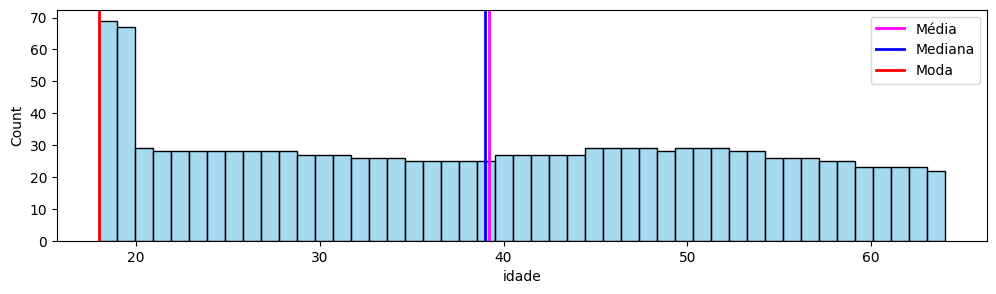

In [ ]:
#histograma de idade
plot_histogram( df, df_descr, "idade", df['idade'].unique().size, (12,3) )

Os dados relativos a pacientes com 18 e 19 anos podem gerar uma distorção no modelo de Machine Learning, pois:
- Há regiões com dados faltantes nessas duas idades.
- A quantidade de pacientes nessas duas idades chega a ser mais que o dobro das demais idades.
- Na idade de 19 anos, a proporção de pacientes na região Sudeste destoa do que pode ser visto nas idades de 20 anos ou mais.

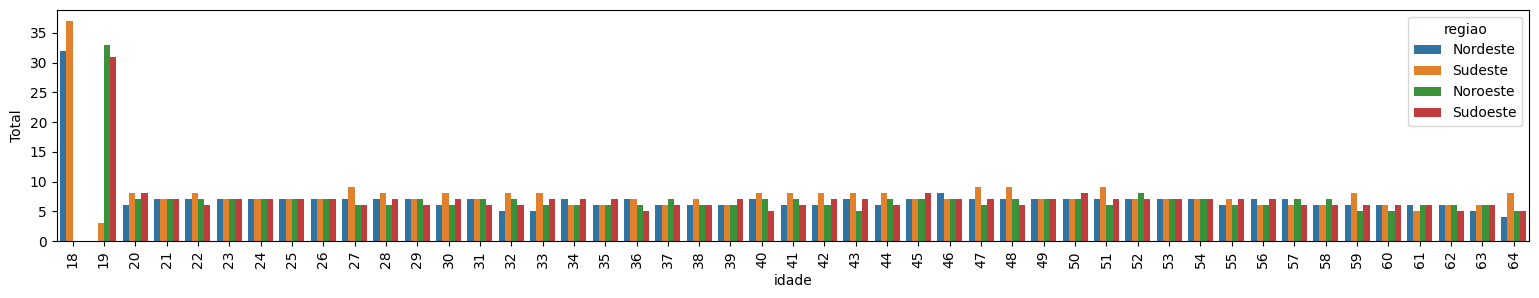

In [ ]:
plot_barplot_hue( df, "idade","regiao", (19,3))

Um ponto interessante é que apesar da distorção nas idades de 18 e 19 anos, não há outliers em relação a idade, como podemos observar no boxplot abaixo:

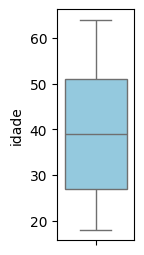

In [ ]:
#boxplot para a idade
plt.figure(figsize=(1,3))
ax=sns.boxplot(df, y='idade',linewidth=1, color='skyblue' )
plt.show()

2.1.5. Análise por IMC

Na distribuição por IMC, a média e a mediana estão bem próxmos, em torno de 30.5 e  moda está próxima também 32.3, indicando que há uma certa simetria na distribuição do IMC.
Importante notar que IMC acima de 25 até 30 é considerada sobrepeso e acima de 30 obeso, ou seja, mais de 75% dos pacientes acima do peso normal e destes 50% são considerados obesos.

In [ ]:
#Cálculo da média (mean) e mediana (50%)
df_descr=df["imc"].describe()
df_descr

,imc
count,1337.000000
mean,30.663452
std,6.100468
min,15.960000
25%,26.290000
50%,30.400000
75%,34.700000
max,53.130000


In [ ]:
#Cálculo da moda
df_descr["moda"]=df["imc"].mode()[0]
df_descr["moda"]

np.float64(32.3)

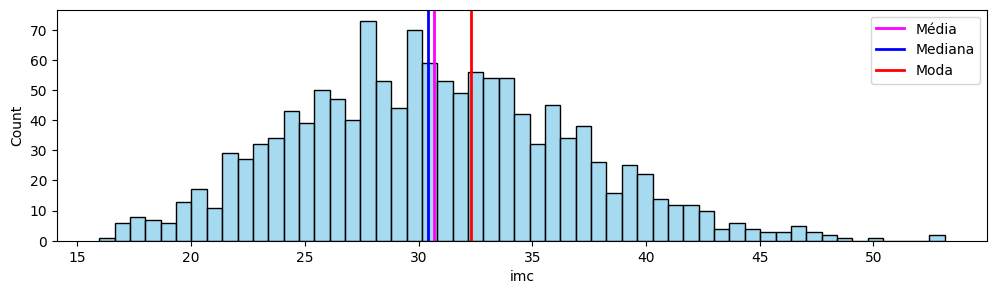

In [ ]:
#histograma do IMC
plot_histogram( df, df_descr, "imc", math.ceil(df['imc'].unique().size/10 ), (12,3))

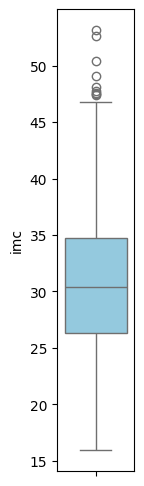

In [ ]:
#boxplot para o imc
plt.figure(figsize=(1,6))
ax=sns.boxplot(df, y='imc',linewidth=1, color='skyblue' )
plt.show()

2.1.6 Análise de quantidade de filhos

In [ ]:
#Cálculo da média (mean) e mediana (50%)
df_descr=df["filhos"].describe()
df_descr

,filhos
count,1337.000000
mean,1.095737
std,1.205571
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [ ]:
#Cálculo da moda
df_descr["moda"]=df["filhos"].mode()[0]
df_descr["moda"]

np.float64(0.0)

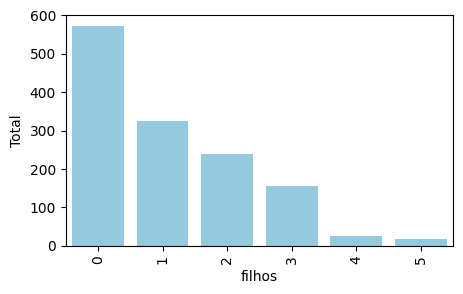

In [ ]:
plot_barplot( df, "filhos", (5,3) )

2.1.7 Análise de encargos médicos

In [ ]:
#Cálculo da média (mean) e mediana (50%)
df_descr=df["encargos"].describe()
df_descr

,encargos
count,1337.000000
mean,13279.121487
std,12110.359656
min,1121.873900
25%,4746.344000
50%,9386.161300
75%,16657.717450
max,63770.428010


In [ ]:
#Cálculo da moda
df_descr["moda"]=df["encargos"].mode()[0]
df_descr["moda"]

np.float64(1121.8739)

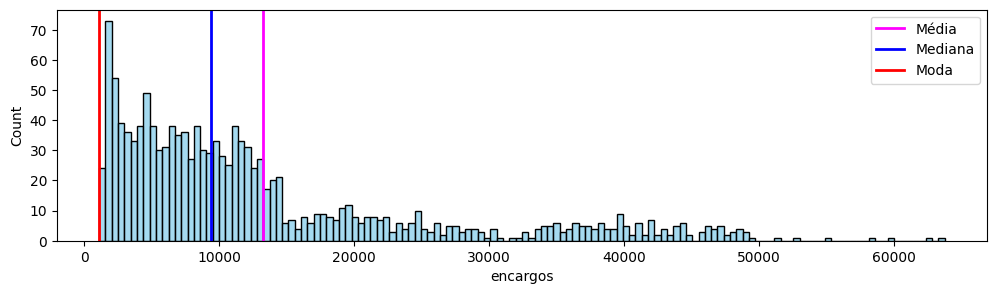

In [ ]:
#histograma de encargos medicos
plot_histogram( df, df_descr, "encargos", math.ceil(df['encargos'].unique().size/10 ), (12,3))

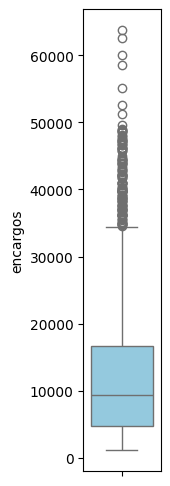

In [ ]:
#boxplot para encargos médicos
plt.figure(figsize=(1,6))
ax=sns.boxplot(df, y='encargos',linewidth=1, color='skyblue' )
plt.show()

2.1.8 Análise de correlações

In [ ]:
corr=df[['idade','faixa_etaria','imc','filhos','encargos']].corr()

<Axes: >

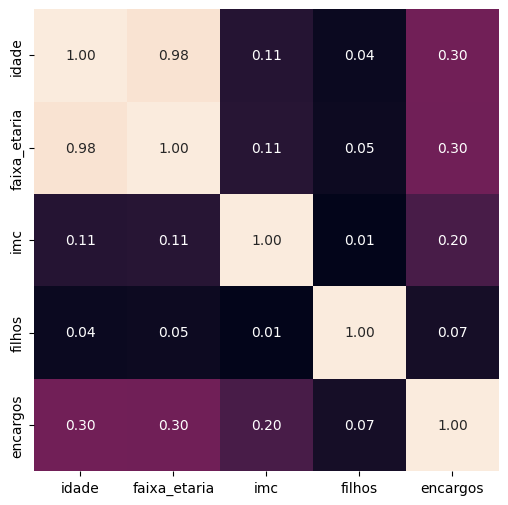

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True, cbar=False,fmt=".2f")

In [ ]:
#df.boxplot(column='tam_terreno',by='zoneamento')

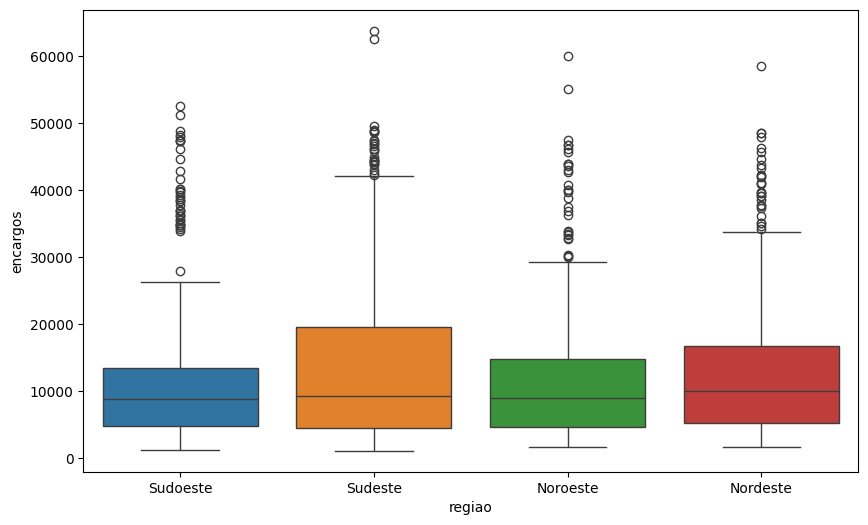

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="regiao",y='encargos',data= df,hue='regiao');

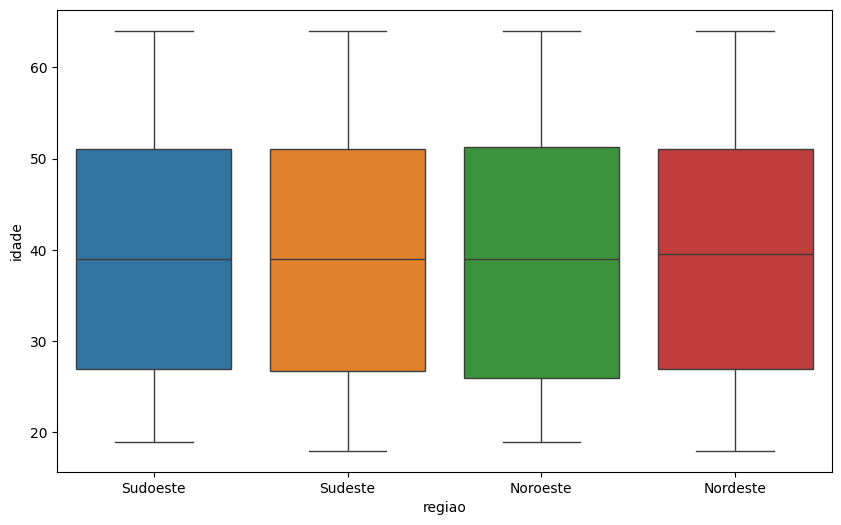

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="regiao",y='idade',data= df,hue='regiao');

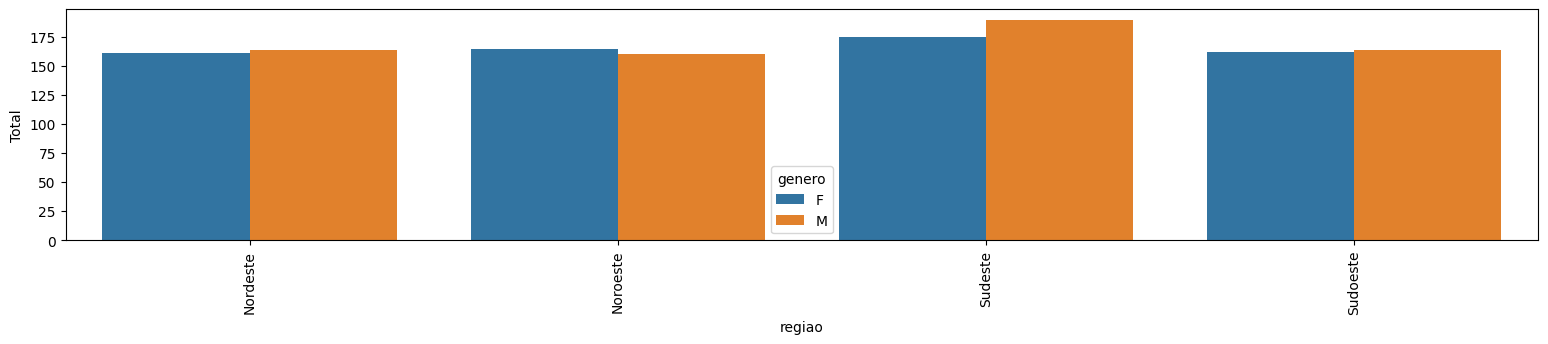

In [ ]:
plot_barplot_hue( df, "regiao","genero", (19,3))

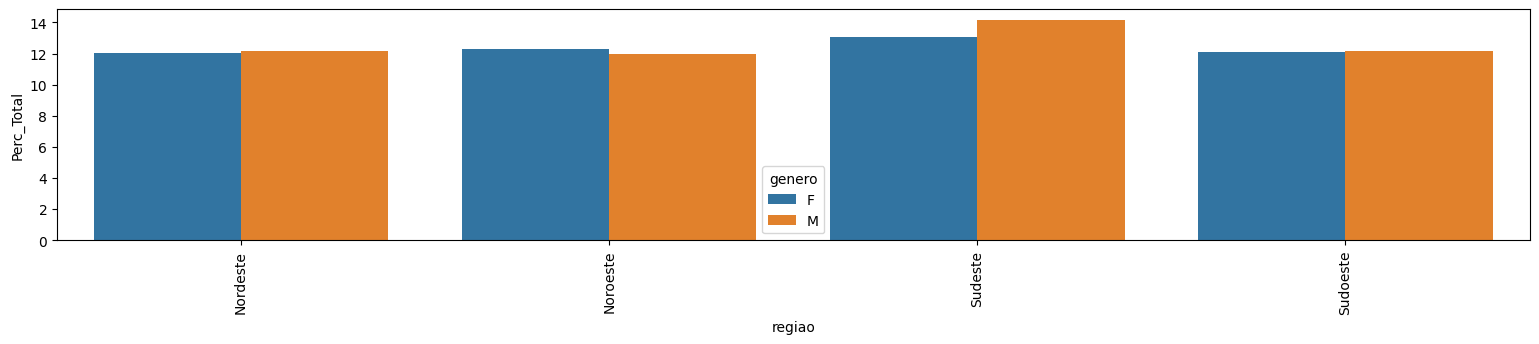

In [ ]:
plot_norm_barplot_hue(df, "regiao", "genero", (19,3))

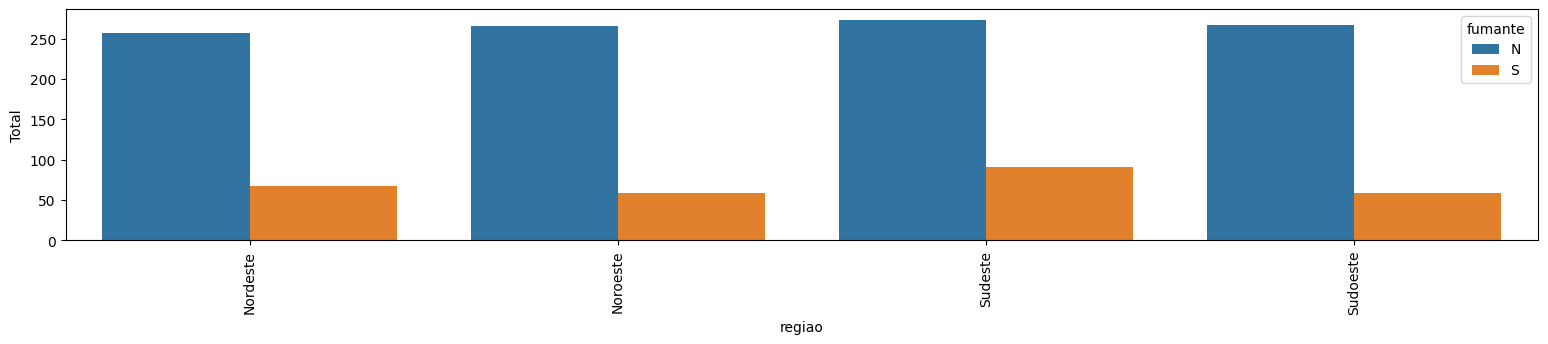

In [ ]:
plot_barplot_hue( df, "regiao","fumante", (19,3))

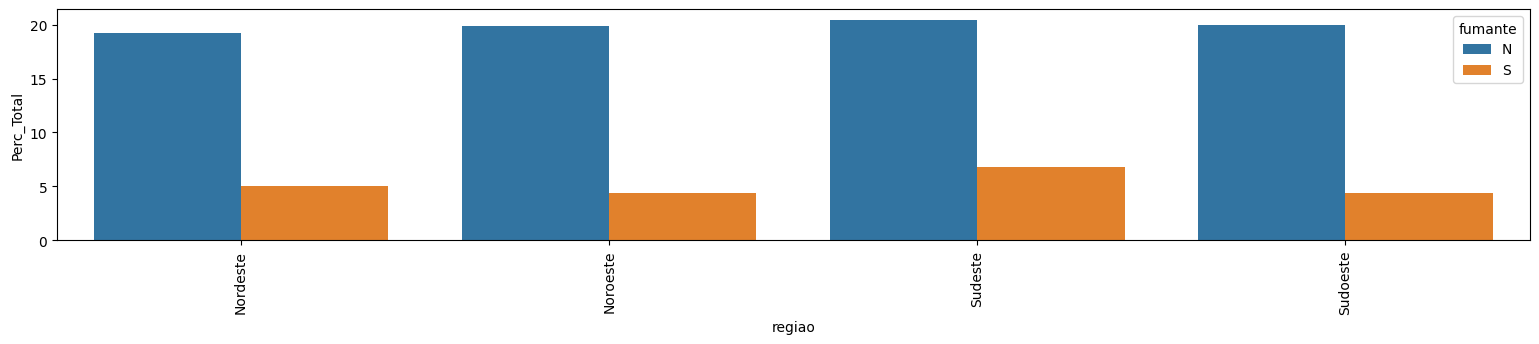

In [ ]:
plot_norm_barplot_hue(df, "regiao", "fumante", (19,3))

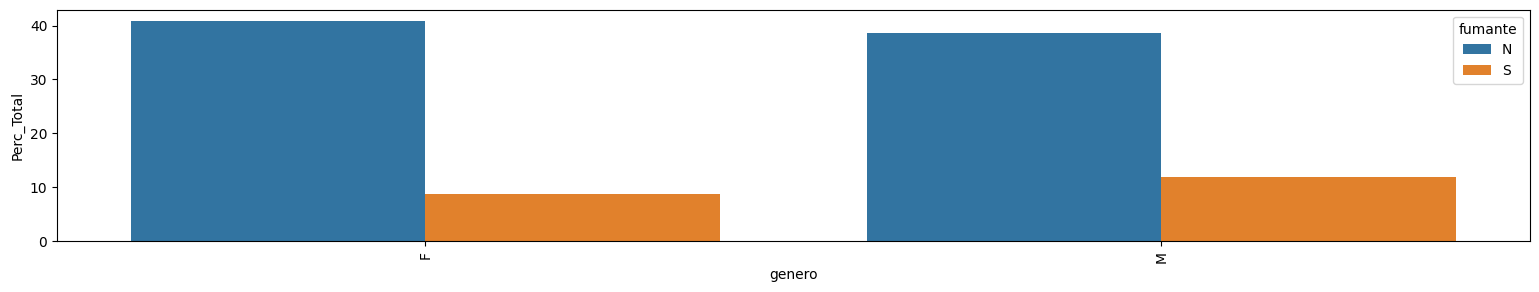

In [ ]:
plot_norm_barplot_hue( df, "genero","fumante", (19,3))

In [ ]:
#Scatter Plot
#df_orders.plot(kind="scatter", x="order_total", y="paid_amount")

--------------------------------------------------------------------------------
#Parte 3: Preparação dos dados

Serão realizados as seguintes processamentos

3.1. Tratamento da base de dados
  * 3.1.1. Sub-Sampling para as idades de 18 e 19 anos
  * 3.1.2. Tratamento de Outliers

3.2. Criação de pipeline para aplicar técnicas de feature engineering.

3.3. Geração de base de dados de treino e testes.

--------------------------------------------------------------------------------
#### 3.1. Tratamento da base de dados



3.1.1. Sub-Sampling para as idades de 18 e 19 anos

As idades de 18 e 19 anos possuem mais de 2.5 vezes mais dados que as demais idades. A fim de se evitar algum vies devido a essa distorção, vão ser selecionados sub-sampling dessas duas idades, com uma quantidade igual a média de quantidade de linhas por idade.

In [ ]:
from sklearn.utils import shuffle

In [ ]:
#Copia as linhas de 20 anos ou mais
df_tmp= df[ df["idade"] >= 20].copy()

In [ ]:
#seleciona um sub-sampling das idades de 18 e 19 anos

#Calcula o número médio de linhas por idade
avg_df_tmp= math.ceil(df_tmp.value_counts("idade").mean())
avg_df_tmp

#retira uma amostra com o número médio de linhas para as idades de 18 e 19 anos (sub-sampling)
df_18= shuffle(df[ df["idade"] == 18], random_state=42)[0:avg_df_tmp].copy()
df_19= shuffle(df[ df["idade"] == 19], random_state=42)[0:avg_df_tmp].copy()
df_18_test=shuffle(df[ df["idade"] == 18], random_state=42)[avg_df_tmp:].copy()
df_19_test= shuffle(df[ df["idade"] == 19], random_state=42)[avg_df_tmp:].copy()
print(df_18.shape, df_19.shape)
print(df_18_test.shape, df_19_test.shape)

(27, 8) (27, 8)
(42, 8) (40, 8)


In [ ]:
#cria a nova base com os sub-sampling das idades de 18 e 19 anos
df_base= pd.concat([df_18,df_19, df_tmp] )
df_base.shape

(1255, 8)

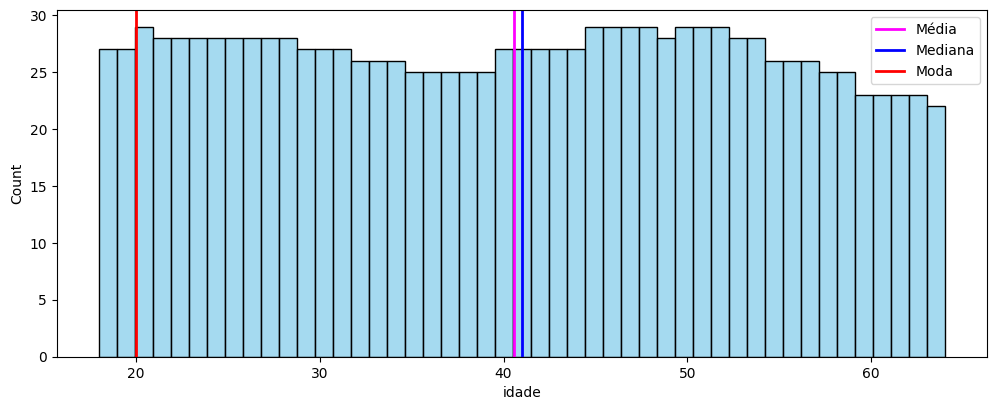

In [ ]:
#histograma de idade
df_base_descr=df_base['idade'].describe()
df_base_descr["moda"]=df_base["idade"].mode()[0]
plot_histogram( df_base, df_base_descr, "idade", df_base['idade'].unique().size, (12,4.5) )


##### 3.1.2 Tratamento de Outliers

Na análise exploratória, verificou-se que o IMC possue outliers.
Esses outliers serão removidos.



In [ ]:
#fator de multimplicação da distância interquartil para que o valor seja considerado outlier
outlier_factor=1.5

In [ ]:
df_base.shape

(1255, 8)

In [ ]:
#remoção dos outliers da variável imc
df_base_descr= df_base.describe()
dist_quartil= df_base_descr['imc']['75%'] - df_base_descr['imc']['25%']
min_value= df_base_descr['imc']['25%'] - outlier_factor * dist_quartil
if ( min_value < 0 ):
  min_value=0.0
max_value= df_base_descr['imc']['75%'] + outlier_factor * dist_quartil

print( 'Valores de IMC fora do intervalo [ ' , min_value , ' , ' , max_value , '] serão removidos' )

df_base.drop(df_base[ (df_base['imc'] < min_value ) | ( df_base['imc'] > max_value )].index,inplace=True)

Valores de IMC fora do intervalo [  13.73875  ,  47.38875 ] serão removidos


In [ ]:
df_base.shape

(1247, 8)

####3.2 Criação de pipeline para aplicar técnicas de feature engineering.

In [ ]:
pip install feature_engine

In [ ]:
#import das bibliotecas de Feature Engineering
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#Separação das variáveis categôricas, numéricas e target
target = 'encargos'
cat_vars = df_base.select_dtypes(include='object').columns.to_list()
num_vars = [col for col in df_base.columns if col not in cat_vars + ['Id', target]]
features=cat_vars+num_vars

In [ ]:
#Criação de pipelines, um para modelos em árvore e outro para modelos de regressão linear
#A diferença é que modelos em regressão linear, as variáveis numéricasserão normalizadas utilizando o Z-Score normalization,
#a fim de se evitar um viés devido a diferença de dimensão entre as variáveis.
#Os modelos em árvores não sofrem com esse viés.

data_tree_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method="median")),
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='Missing', return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

data_linear_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method="median")),
    ('standard_scaler', SklearnTransformerWrapper(variables=num_vars,transformer=StandardScaler())),
    ('categoric_imputer', CategoricalImputer(variables=cat_vars, fill_value='Missing', return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

In [ ]:
data_tree_pipe

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['idade', 'imc', 'filhos'])),
                ('categoric_imputer',
                 CategoricalImputer(return_object=True,
                                    variables=['genero', 'fumante', 'regiao',
                                               'faixa_etaria'])),
                ('one_hot_encoder',
                 OneHotEncoder(variables=['genero', 'fumante', 'regiao',
                                          'faixa_etaria']))])

In [ ]:
data_linear_pipe

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['idade', 'imc', 'filhos'])),
                ('standard_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['idade', 'imc',
                                                      'filhos'])),
                ('categoric_imputer',
                 CategoricalImputer(return_object=True,
                                    variables=['genero', 'fumante', 'regiao',
                                               'faixa_etaria'])),
                ('one_hot_encoder',
                 OneHotEncoder(variables=['genero', 'fumante', 'regiao',
                                          'faixa_etaria']))])

####3.3 Separação da base de dados entre treino e teste

In [ ]:
#import da biblioteca para gerar bases de treino e testes
from sklearn.model_selection import train_test_split

In [ ]:
X=df_base.filter(features)
y=df_base.filter([target])

In [ ]:
#Separação em 80% na base de treino e 20% na base de teste
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size= 0.2, random_state=42)
print("Linhas na base de treino:", X_train.shape[0], "Linhas na base de teste", y_test.shape[0])

Linhas na base de treino: 997 Linhas na base de teste 250


In [ ]:
#Incluir na base de testes os dados de 18 e 19 anos que foram retirados do sub-sampling
df_18_19_test= pd.concat([df_18_test, df_19_test])
X_18_19_test= df_18_19_test.filter(features)
y_18_19_test= df_18_19_test.filter([target])
X_test=pd.concat( [X_test, X_18_19_test ])
y_test=pd.concat( [y_test, y_18_19_test ])

#Parte 4 - Regressão

In [ ]:
!pip install feature-engine catboost lightgbm

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

#from sklearn.linear_model import SGDRegressor
#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor


In [ ]:
models = [
    ('Linear_reg', LinearRegression()),
    ('Ridge_reg', Ridge(random_state=42)),
    ('Decision_tree', DecisionTreeRegressor(random_state=42)),
    ('Random_forest', RandomForestRegressor(random_state=42)),
    ('Catboost', CatBoostRegressor(random_state=42))
]

In [ ]:
# Para visualizer as métricas disponíveis para o cross_val_score
import sklearn
print(sklearn.metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

####4.1. Cross Validation
Realiza o Cross Validation utilizando o Stratified K-folder, gerando para cada modelo as métricas de R2 ajustado, MAE e RMSE

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# definindo a estratégia de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# definindo a lista de métricas utilizadas
metricas = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# criando um dicionário irá conter os resultados dos modelos
dict_cross_val_result = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

# treinando e avaliando todos os modelos que estão na lista `models`
for model in models:
    model_pipe = Pipeline(steps=data_linear_pipe.steps + [model])

    cv_results = cross_validate(estimator=model_pipe, X=X_train, y=y_train, scoring=metricas, cv=kfold, n_jobs=-1)
    cv_results_df = pd.DataFrame(cv_results)

    r2 = cv_results_df.mean().loc['test_r2']
    mae = np.abs(cv_results_df.mean().loc['test_neg_mean_absolute_error'])
    rmse = np.abs(cv_results_df.mean().loc['test_neg_root_mean_squared_error'])

    # populando a tabela com os resultados
    dict_cross_val_result['model'].append(model_pipe.steps[-1][0])
    dict_cross_val_result['r2'].append(r2)
    dict_cross_val_result['mae'].append(mae)
    dict_cross_val_result['rmse'].append(rmse)



In [ ]:
df_cross_val_result = pd.DataFrame(dict_cross_val_result)
pd.options.display.float_format = '{:.4f}'.format
df_cross_val_result.sort_values(by='mae')

,model,r2,mae,rmse
3,Random_forest,0.8416,2635.7681,4728.4104
4,Catboost,0.8436,2681.5768,4715.5357
2,Decision_tree,0.7189,2981.3285,6242.4960
0,Linear_reg,0.7488,4075.9876,5987.5819
1,Ridge_reg,0.7490,4081.9076,5984.9245


#

#####4.2. Predição
Realiza a predição para cada modelo definido, gerando as métricas R2, MAE e RMSE

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error


def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado


def Calc_Model_Metrics( dict_metric, model_name, y_base_test, y_baset_pred_test, X_base_train ):
    r2_ajustado = adjusted_r2(y_test, y_pred_test, X_train)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = root_mean_squared_error(y_test, y_pred_test)

    dict_metric['model'].append(model_name)
    dict_metric['r2'].append(r2_ajustado)
    dict_metric['mae'].append(mae)
    dict_metric['rmse'].append(rmse)


In [ ]:
# criando um dicionário irá conter os resultados das previsões dos modelos
dict_predict_result = {'model': [], 'y_pred_train': [], 'y_pred_test': []}
dict_predict_metric = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

In [ ]:
y_train.shape

(997, 1)

In [ ]:
for model in models:
    model_pipe = Pipeline(steps=data_linear_pipe.steps + [model])
    model_pipe.fit(X_train, y_train )

    y_pred_train = model_pipe.predict(X_train)
    y_pred_test  = model_pipe.predict(X_test)

    Calc_Model_Metrics( dict_predict_metric, model_pipe.steps[-1][0], y_test, y_pred_test, X_train )

    dict_predict_result['model'].append(model_pipe.steps[-1][0])
    dict_predict_result['y_pred_train'].append(y_pred_train)
    dict_predict_result['y_pred_test'].append(y_pred_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Learning rate set to 0.040924
0:	learn: 11674.0031697	total: 47.9ms	remaining: 47.9s
1:	learn: 11329.3516399	total: 48.5ms	remaining: 24.2s
2:	learn: 10994.7028034	total: 49.3ms	remaining: 16.4s
3:	learn: 10680.0338297	total: 50.4ms	remaining: 12.5s
4:	learn: 10380.6124658	total: 51.5ms	remaining: 10.2s
5:	learn: 10090.5633634	total: 55.6ms	remaining: 9.21s
6:	learn: 9821.7727580	total: 56.7ms	remaining: 8.04s
7:	learn: 9561.0894790	total: 57.7ms	remaining: 7.15s
8:	learn: 9320.7225166	total: 63.2ms	remaining: 6.96s
9:	learn: 9112.3359057	total: 63.7ms	remaining: 6.3s
10:	learn: 8874.7284239	total: 64.7ms	remaining: 5.82s
11:	learn: 8648.4853279	total: 66.3ms	remaining: 5.46s
12:	learn: 8438.4018025	total: 71.8ms	remaining: 5.45s
13:	learn: 8247.3129459	total: 72.4ms	remaining: 5.1s
14:	learn: 8051.3906188	total: 75ms	remaining: 4.92s
15:	learn: 7871.8341821	total: 76ms	remaining: 4.67s
16:	learn: 7678.3242650	total: 77ms	remaining: 4.45s
17:	learn: 7507.3555913	total: 78.6ms	remaining

In [ ]:
df_predict_metric = pd.DataFrame(dict_predict_metric)
pd.options.display.float_format = '{:.4f}'.format
df_predict_metric.sort_values(by='mae')

,model,r2,mae,rmse
4,Catboost,0.8264,2680.0367,4881.7787
3,Random_forest,0.8165,2722.4334,5019.4067
2,Decision_tree,0.6792,2955.1084,6636.2599
0,Linear_reg,0.7212,4252.1048,6186.6336
1,Ridge_reg,0.7217,4254.6008,6181.2491


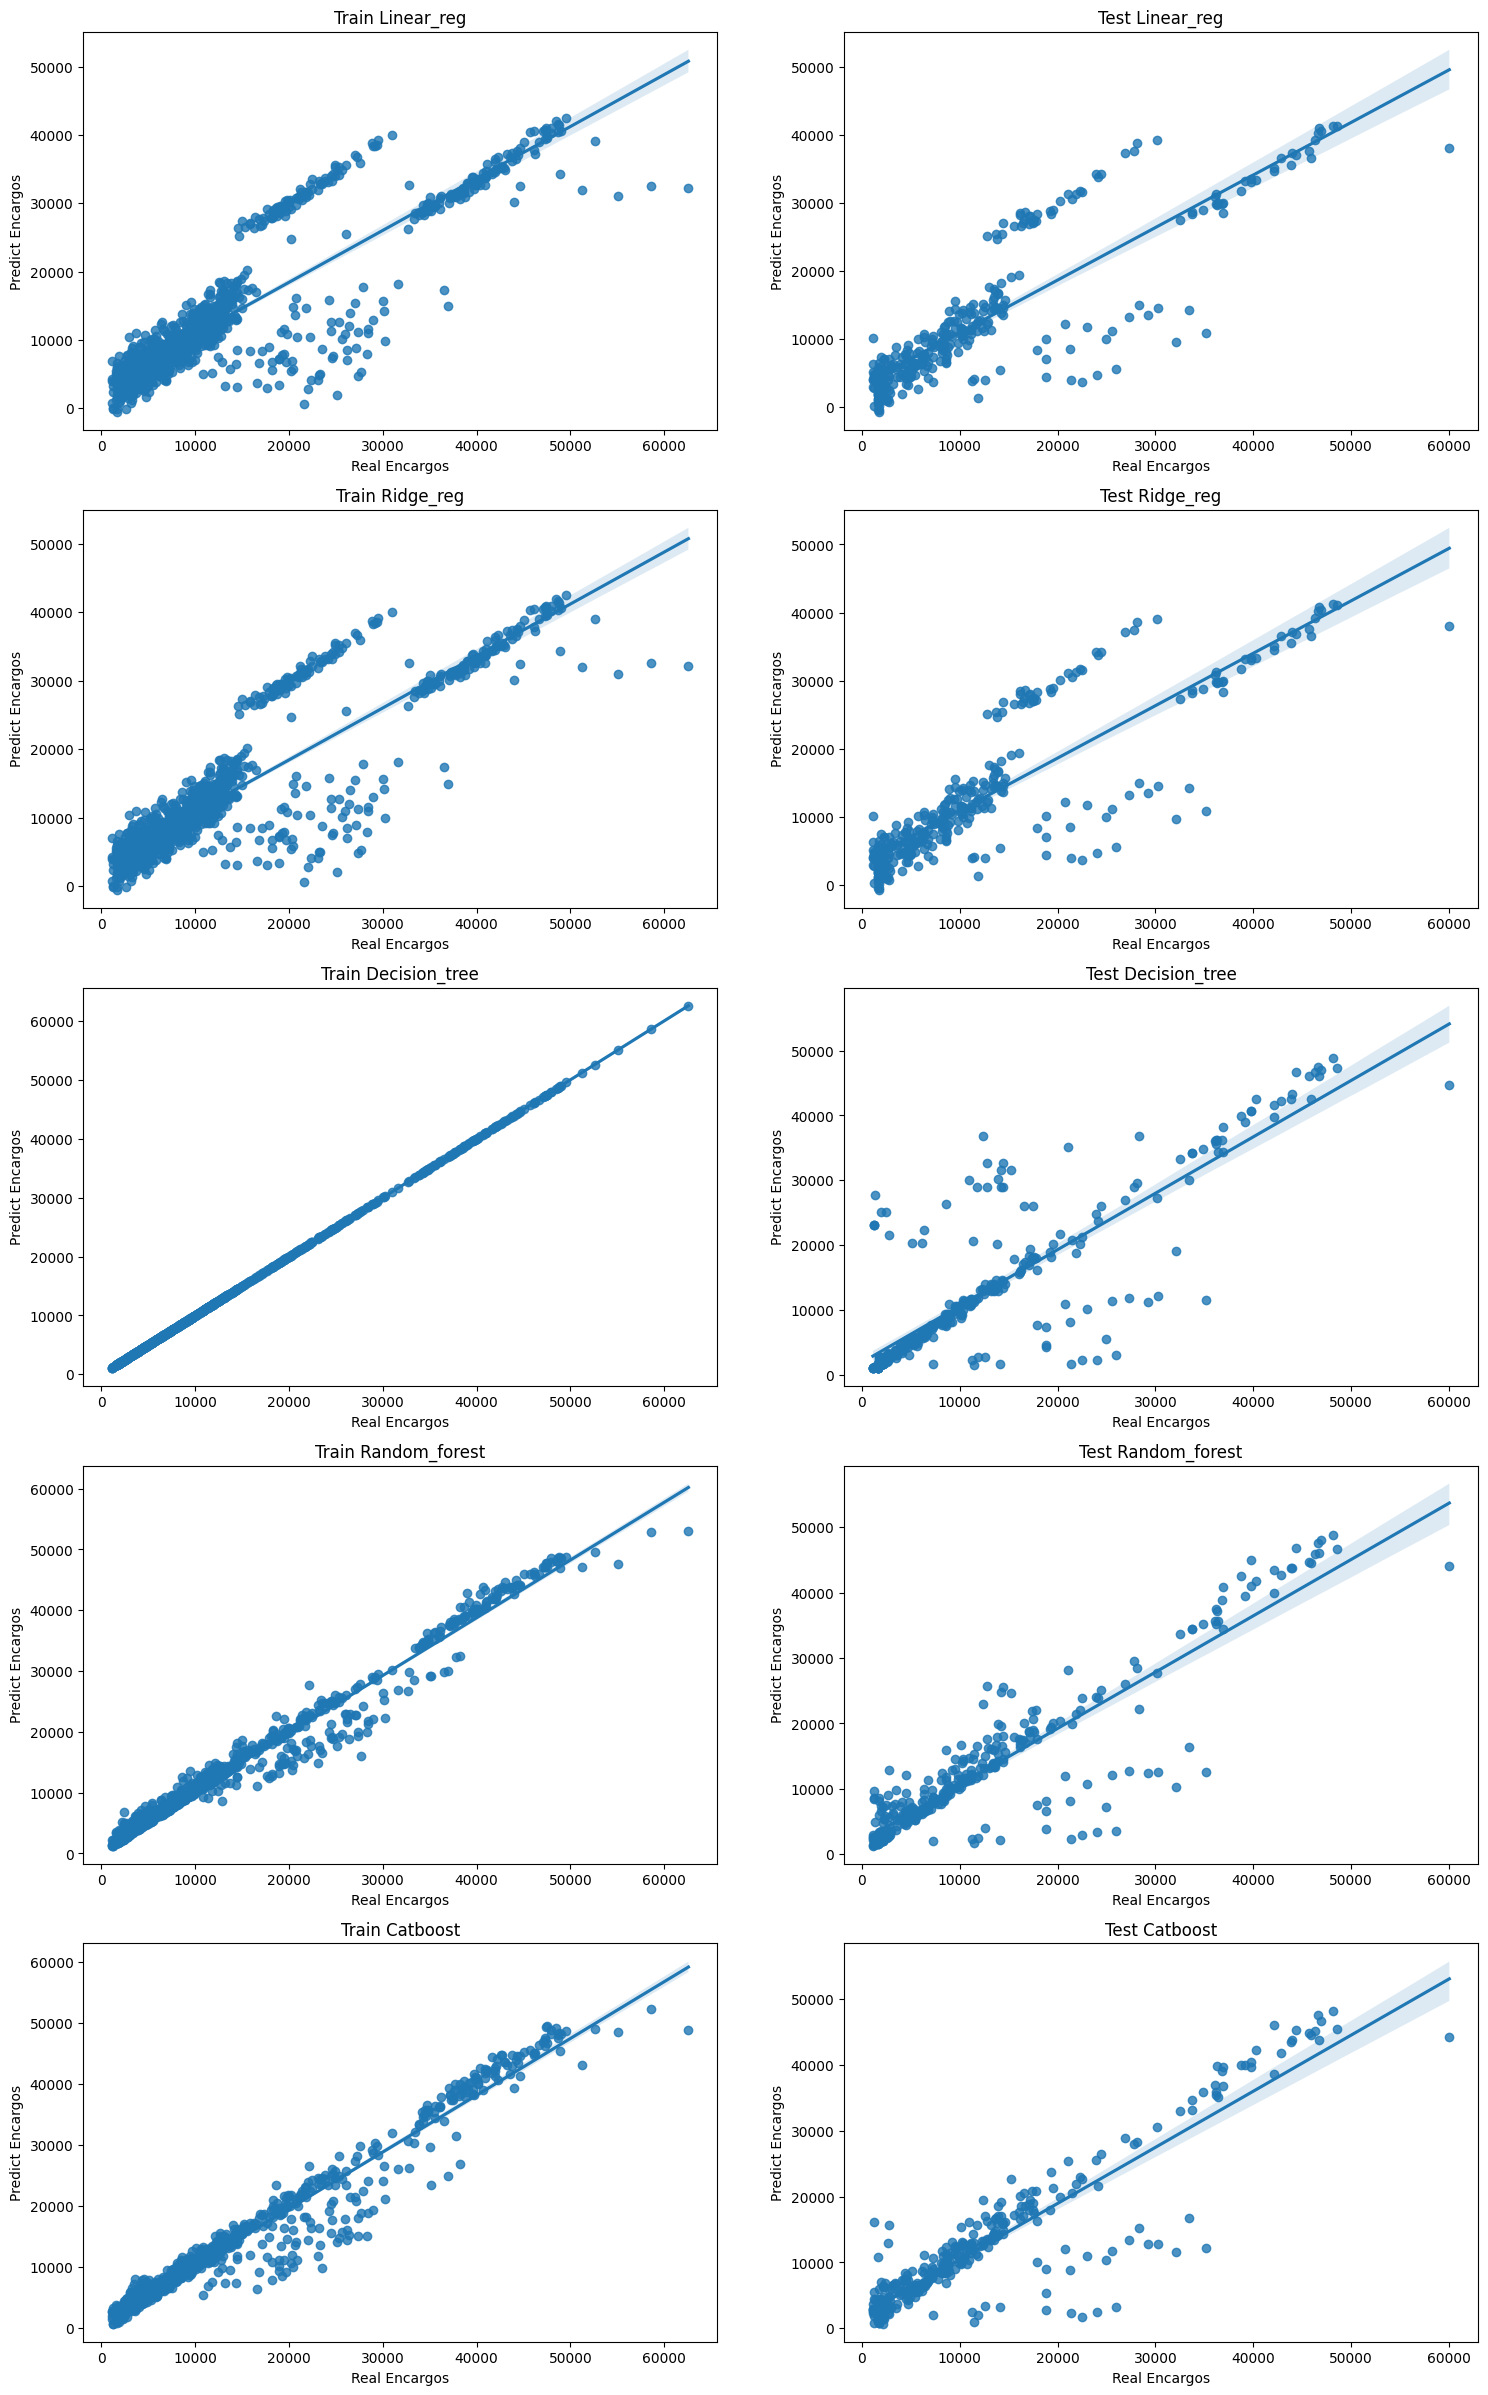

In [ ]:
import statsmodels.api as sm

#Gerar gráficos entre valor de encargos reais e previstos na base de teste
df_predict_result = pd.DataFrame(dict_predict_result)

fig, ax = plt.subplots(figsize=(18,30), nrows=5, ncols=2)
ijk=0

for name_model in df_predict_metric.model:
  y_pred_train= pd.DataFrame( df_predict_result[ df_predict_result['model']== name_model ]['y_pred_train'][ijk])
  y_pred_test=  pd.DataFrame( df_predict_result[ df_predict_result['model']== name_model ]['y_pred_test'][ijk])
  sns.regplot(x=y_train, y=y_pred_train, ax=ax[ijk][0])
  sns.regplot(x=y_test, y=y_pred_test, ax=ax[ijk][1])
  ax[ijk][0].set_ylabel('Predict Encargos')
  ax[ijk][0].set_xlabel('Real Encargos')
  ax[ijk][1].set_ylabel('Predict Encargos')
  ax[ijk][1].set_xlabel('Real Encargos')
  ax[ijk][0].set_title('Train' + " " + name_model)
  ax[ijk][1].set_title('Test'  + " " + name_model);


  y_pred_test_array= df_predict_result[ df_predict_result['model']== name_model ]['y_pred_test'][ijk]
  X_sm = sm.add_constant(y_test['encargos'])
  # OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
  results = sm.OLS(y_pred_test_array, X_sm).fit()
  # mostrando as estatísticas do modelo
  results.t_test([1, 0])

  ijk=ijk+1

In [ ]:
import statsmodels.api as sm

#Regressão linear entre o resultado predito e o resultado real por modelo
#df_predict_result = pd.DataFrame(dict_predict_result)

ijk=0

for name_model in df_predict_metric.model:
  y_pred_test_array= df_predict_result[ df_predict_result['model']== name_model ]['y_pred_test'][ijk]
  X_sm = sm.add_constant(y_test['encargos'])
  # OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
  results = sm.OLS(y_pred_test_array, X_sm).fit()
  print(results.summary())
  # mostrando as estatísticas do modelo
  print(results.t_test([1, 0]))

  ijk=ijk+1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     894.8
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           5.45e-96
Time:                        17:05:29   Log-Likelihood:                -3333.6
No. Observations:                 332   AIC:                             6671.
Df Residuals:                     330   BIC:                             6679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3203.5657    441.414      7.258      0.0

In [ ]:
y_pred_test.rename(columns={0:"Test_Predct_Encargos"}, inplace= True)

In [ ]:
y_pred_test['Test_Predct_Encargos']

,Test_Predct_Encargos
0,10442.2445
1,19876.3324
2,4512.5720
3,11990.4957
4,11129.4624
...,...
327,727.8891
328,18550.2725
329,2774.4975
330,1858.4813


In [ ]:
y_pred_test= df_predict_result[ df_predict_result['model']== 'Catboost' ]['y_pred_test'][4]

In [ ]:
y_pred_test[0:3]

array([ 9249.4952, 21659.9301,  4779.6023])

In [ ]:
y_pred_test[0:5]

array([10442.24447617, 19876.33237366,  4512.57203859, 11990.4956955 ,
       11129.46243023])

In [ ]:
y_test['encargos'].head(5)

,encargos
707,10264.4421
1208,20296.8635
952,4527.1830
216,10355.6410
315,9722.7695


In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(y_test['encargos'])
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y_pred_test, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

ValueError: The indices for endog and exog are not aligned

In [ ]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1899.0643    362.587      5.238      0.000    1185.790    2612.338


In [ ]:
y_pred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Encargo_Predict  332 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [ ]:
target = 'encargos'
cat_vars = df_base.select_dtypes(include='object').columns.to_list()
num_vars = [col for col in df_base.columns if col not in cat_vars + ['Id', target]]
features=cat_vars+num_vars

In [ ]:
abc.rename(columns={0: "Y_TRAIN"})

,index,Y_TRAIN
0,0,10115.1087
1,1,36539.6090
2,2,11077.9480
3,3,7543.0865
4,4,44643.0088
...,...,...
992,992,11787.3881
993,993,12561.1343
994,994,6072.2801
995,995,16667.4110


In [ ]:
y_pred_train.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
y_pred_train.rename(columns={"0": "encargos_real"})

,0
0,10115.1087
1,36539.6090
2,11077.9480
3,7543.0865
4,44643.0088
...,...
992,11787.3881
993,12561.1343
994,6072.2801
995,16667.4110


In [ ]:
for name_model in df_predict_metric.model:
  y_pred_train= pd.DataFrame( df_predict_result[ df_predict_result['model']== name_model ]['y_pred_train'][ijk])
  y_pred_test=  pd.DataFrame( df_predict_result[ df_predict_result['model']== name_model ]['y_pred_test'][ijk])

  y_result= pd.concat( [y_pred_train, y_pred_test] )

In [ ]:
y_pred_train

In [ ]:
y_train

In [ ]:
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

In [ ]:
best_model = Pipeline(data_tree_pipe.steps + [('catboost', CatBoostRegressor(random_state=42))])

In [ ]:
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

In [ ]:
best_model.summary()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

--------------------------------------------------------------------------------
#SANDBOX 1

In [ ]:
data_pipe_linear =Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method="median")),
    ("scale", SklearnTransformerWrapper(transformer= StandardScaler(), variables=num_vars)),
    ("categoric_imputer",CategoricalImputer(fill_value="Missing",variables=cat_vars)),
    ("ohe",OneHotEncoder(variables=cat_vars))
])

#treiando
df_pipe_linear=data_pipe_linear.fit_transform(X_test)
#data_pipe_linear_Ridge.fit(X_train,y_train)

#prevendo
#y_previsto= data_pipe_linear_Ridge.predict(X_test)

In [ ]:
df_pipe_linear.head()

In [ ]:
data_pipe_linear_Ridge.summary()

In [ ]:
!pip install feature-engine catboost lightgbm

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from  sklearn.metrics import mean_absolute_percentage_error

In [ ]:
data_pipe_linear_XGBRegressor =Pipeline(steps=[
    ("numeric_imputer", ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ("categoric_imputer",CategoricalImputer(fill_value="Missing",variables=cat_vars)),
    ("ohe",OneHotEncoder(variables=cat_vars)),
    ("XGBRegressor",XGBRegressor(random_state=42))
])

#treiando
data_pipe_linear_XGBRegressor.fit(X_train,y_train)

#prevendo
y_previsto= data_pipe_linear_XGBRegressor.predict(X_test)

#resultados
print("XGBRegressor")
r2_noteste = r2_score(y_test, y_previsto)
print(f"R2 no traino {r2_noteste}")
mae_noteste = mean_absolute_error(y_test, y_previsto)
print(f"MAE no teste {mae_noteste}")
mse_noteste = mean_squared_error(y_test, y_previsto)
print(f"MSE no teste {mse_noteste}")
#rmse_noteste = mean_squared_error(y_test, y_previsto, squared=False)
#print(f"RMSE no teste {rmse_noteste}")
max_error_noteste = max_error(y_test, y_previsto)
print(f"max_erro no teste {max_error_noteste}")
medae_error_noteste = median_absolute_error(y_test, y_previsto)
print(f"medae no teste {medae_error_noteste}")
mape_error_noteste = mean_absolute_percentage_error(y_test, y_previsto)
print(f"mape no teste {mape_error_noteste}")

In [ ]:
sns.regplot(x=y_previsto, y=y_test)

--------------------------------------------------------------------------------
##***** Sand Box *****************************************************************

In [ ]:
#Calculo da média, desvio padrão, mínimo, máximo e quartis das variáveis numéricas
#idade, imc, quantidade de filhos, encargos
df.describe()

In [ ]:
#Cálculo das frequências
df.describe(include='object')

In [ ]:
#Cálculo das frequências por gênero
df.value_counts(["genero"], normalize= True)*100

In [ ]:
#Cálculo das frequências por fumante ou não fumante
df.value_counts(["fumante"], normalize= True)*100

In [ ]:
#Cálculo das frequências por região
df.value_counts(["regiao"], normalize= True)*100

In [ ]:
#Cálculo das frequências por faixa etária
df.value_counts(["faixa_etaria"], normalize= True)*100

In [ ]:
def apol_histplot( df, coluna, nbins ):
  ##df_tmp_apol=df.groupby(coluna).agg( TOTAL_COL= (coluna, 'count')).reset_index()
  ##df_tmp_apol[coluna]= df_tmp_apol[coluna].astype(str)
  ##df_tmp_apol['PERC_APOL']= round((df_tmp_apol['TOTAL_COL']/df.shape[0]) * 100,2)
  plt.figure(figsize=(6,3))
  if ( nbins > 0 ):
    ax=sns.histplot(data=df, x=coluna, bins=nbins)
  else:
    ax=sns.histplot(data=df, x=coluna)
  plt.show()

apol_histplot( df.sort_values("faixa_etaria",ascending=True), "faixa_etaria",6)

In [ ]:
new_var = df['idade'].unique().size
new_var

In [ ]:
def apol_barplot( df, coluna, linhas ):
  df_tmp_apol=df.groupby([coluna,'regiao']).agg( TOTAL_COL= (coluna, 'count')).reset_index()
  df_tmp_apol[coluna]= df_tmp_apol[coluna].astype(str)
  df_tmp_apol['PERC_APOL']= round((df_tmp_apol['TOTAL_COL']/df.shape[0]) * 100,2)
  plt.figure(figsize=(19,3))
  if ( linhas > 0 ):
    ax=sns.barplot(data=df_tmp_apol.sort_values(coluna, ascending= True).head(linhas), x=coluna, y='TOTAL_COL',hue='regiao')
  else:
    ax=sns.barplot(data=df_tmp_apol.sort_values(coluna, ascending= True), x=coluna, y='TOTAL_COL',hue='regiao')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
apol_barplot( df.sort_values("idade",ascending=True), "idade",0)

In [ ]:
apol_barplot( df, "idade",0)

In [ ]:
df.hist(bins=40,figsize=(20,15))

In [ ]:
#boxplot para a encargos
plt.figure(figsize=(1,3))
ax=sns.boxplot(df, y='encargos',linewidth=1, color='skyblue' )
plt.show()

In [ ]:
#boxplot para a encargos
plt.figure(figsize=(1,3))
ax=sns.boxplot(df, y='imc',linewidth=1, color='skyblue' )
plt.show()

In [ ]:
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data_tree_pipe = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

data_linear_pipe = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
    ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])